In [1]:
import pandas as pd
%matplotlib inline
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from ggplot import *

df = pd.read_csv('centrality.csv')

groups = [i.split('\t') for i in tuple(open('mcm.out'))]

def ingroup(x):
    for i,j in enumerate(groups):
        if x in j: return str(int(i))
    #print 'not found' + x
        
df['labels'] = df['Unnamed: 0'].apply(ingroup)

df.columns

/Users/dna/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/dna/miniconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/dna/miniconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/dna/miniconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module inste

Index([u'Unnamed: 0', u'Flux', u'FluxIn', u'FluxOut', u'Closeness',
       u'EigenCentrality', u'PageRank', u'Betweenness', u'Authorities',
       u'Hubs', u'labels'],
      dtype='object')

[t-SNE] Computing 674 nearest neighbors...
[t-SNE] Indexed 675 samples in 0.003s...
[t-SNE] Computed neighbors for 675 samples in 0.074s...
[t-SNE] Computed conditional probabilities for sample 675 / 675
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 29.905758
[t-SNE] Error after 300 iterations: 0.000012
t-SNE done! Time elapsed: 14.3662400246 seconds


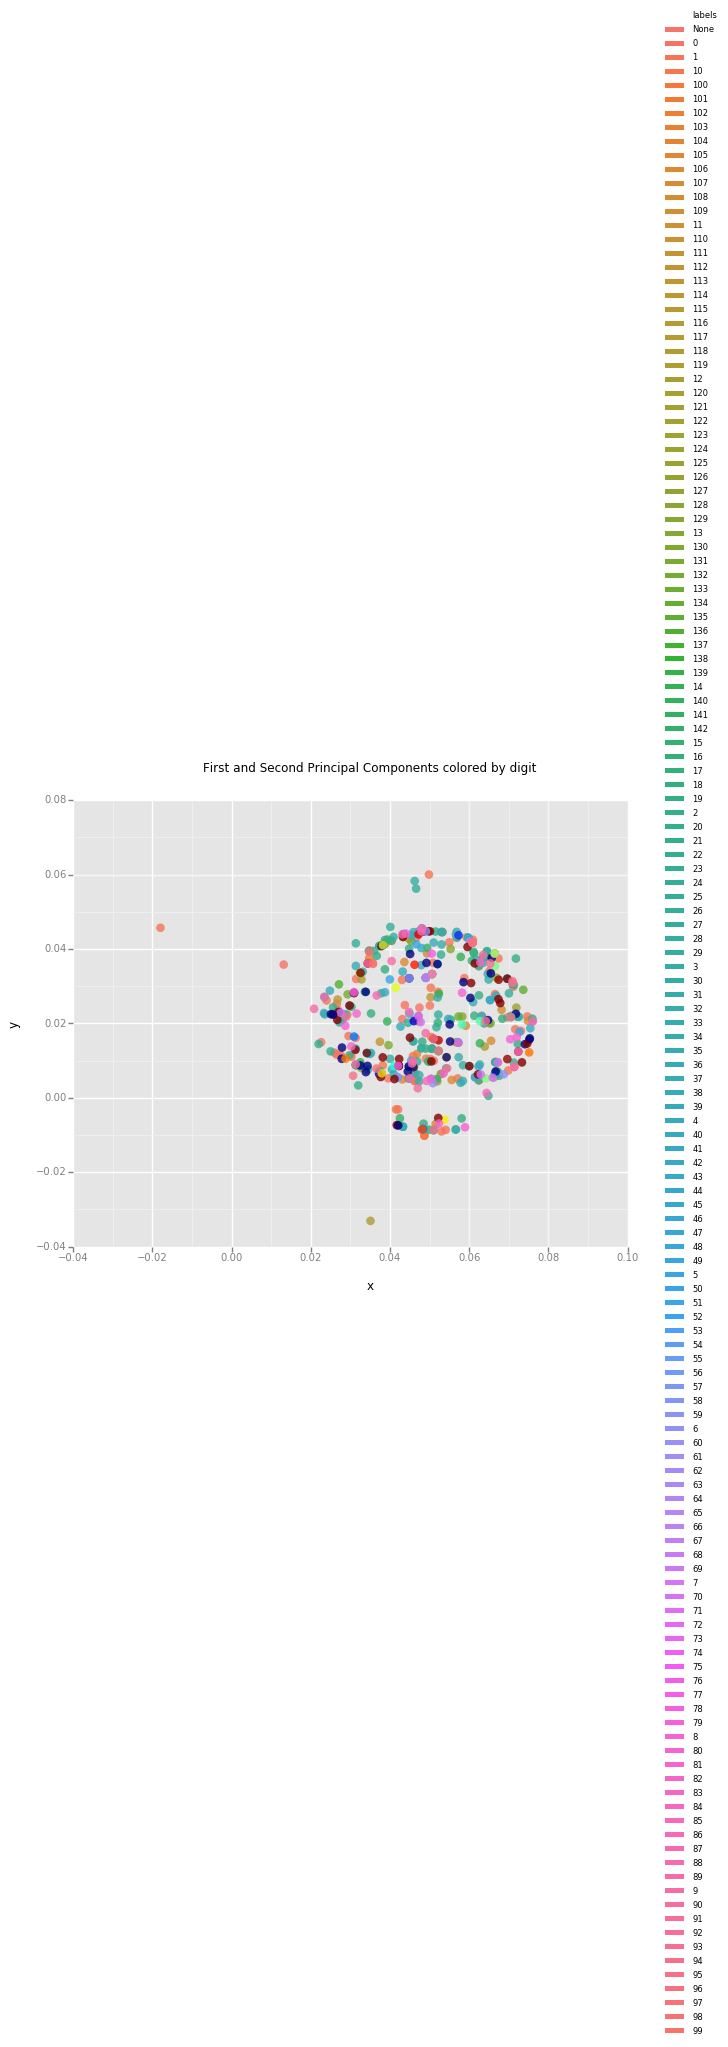

<ggplot: (301350001)>

In [6]:
selected_columns = ['Flux','FluxIn','FluxOut']

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=5000, n_iter=300)
tsne_results = tsne.fit_transform(df[selected_columns].values)
print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

df['x']= tsne_results[:,0]
df['y']= tsne_results[:,1]

ggplot( df, aes(x='x', y='y', color='labels') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 675 samples in 0.002s...
[t-SNE] Computed neighbors for 675 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 675 / 675
[t-SNE] Mean sigma: 0.000815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.836086
[t-SNE] Error after 1100 iterations: 0.201097
t-SNE done! Time elapsed: 20.532777071 seconds


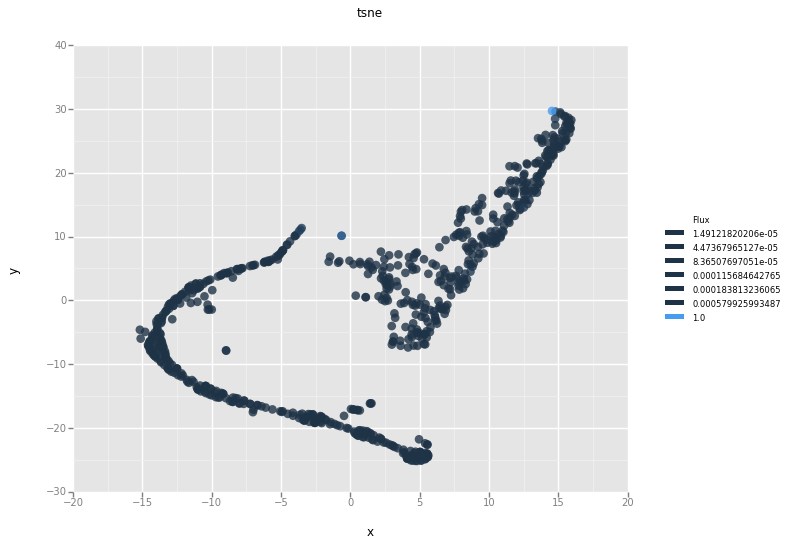

<ggplot: (309403457)>

In [17]:
selected_columns = ['PageRank','Betweenness','EigenCentrality','Authorities']

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=3100)
tsne_results = tsne.fit_transform(df[selected_columns].values)
print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

df['x']= tsne_results[:,0]
df['y']= tsne_results[:,1]

ggplot( df, aes(x='x', y='y', color='Flux') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("tsne")


